In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Scikit-Learn
import sklearn
import cv2

# Common imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()

In [ ]:
# import data from csv
data = pd.read_csv("/content/drive/MyDrive/mini proj/sign_mnist_train.csv").values

In [ ]:
# check shape of data
print("Training data shape: ",data.shape)

Training data shape:  (27455, 785)


In [ ]:
data

array([[  3, 107, 118, ..., 204, 203, 202],
       [  6, 155, 157, ..., 103, 135, 149],
       [  2, 187, 188, ..., 195, 194, 195],
       ...,
       [ 18, 174, 174, ..., 202, 200, 200],
       [ 17, 177, 181, ...,  64,  87,  93],
       [ 23, 179, 180, ..., 205, 209, 215]])

In [ ]:
# set up and reshape training data
X = data[:, 1:].reshape(data.shape[0],28, 28).astype('float64')
y = data[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, shuffle=True)

In [ ]:
# check shape of data
print("Training data shape: ",X_train.shape)
print("Training data shape: ",y_train.shape)
print()
print("Testing data shape: ",X_test.shape)
print("Testing data shape: ",y_test.shape)

Training data shape:  (20591, 28, 28)
Training data shape:  (20591,)

Testing data shape:  (6864, 28, 28)
Testing data shape:  (6864,)


In [ ]:
# data type
print(X_train.dtype)
print(y_train.dtype)

print(X_test.dtype)
print(y_test.dtype)

float64
int64
float64
int64


In [ ]:
# get unique values in y_train
val,counter = np.unique(y_train,return_counts=True)
print("Labels: ")
print(val)
print("Total number of each images of a class in the dataset: ")
print(counter)

Labels: 
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Total number of each images of a class in the dataset: 
[853 776 864 883 716 887 827 761 877 843 903 773 872 908 828 929 961 859
 904 880 842 918 872 855]


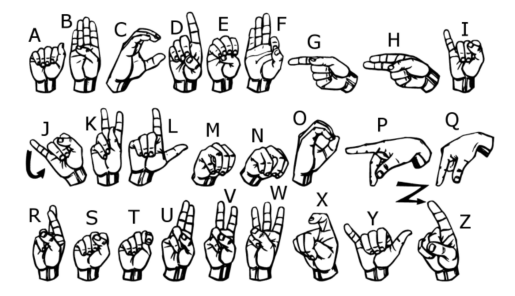

In [ ]:
img = plt.imread('/content/drive/MyDrive/mini proj/american_sign_language.PNG')
plt.axis('off')
plt.imshow(img)

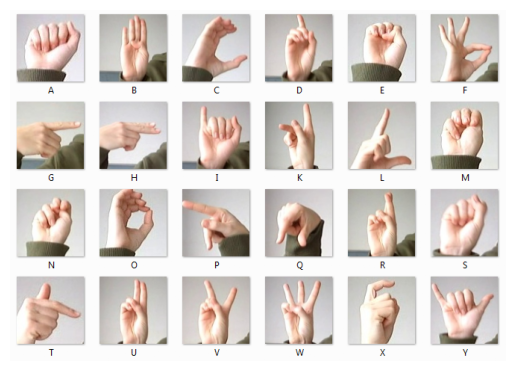

In [ ]:
img = plt. imread('/content/drive/MyDrive/mini proj/amer_sign2.png')
plt.axis('off')
plt. imshow(img)

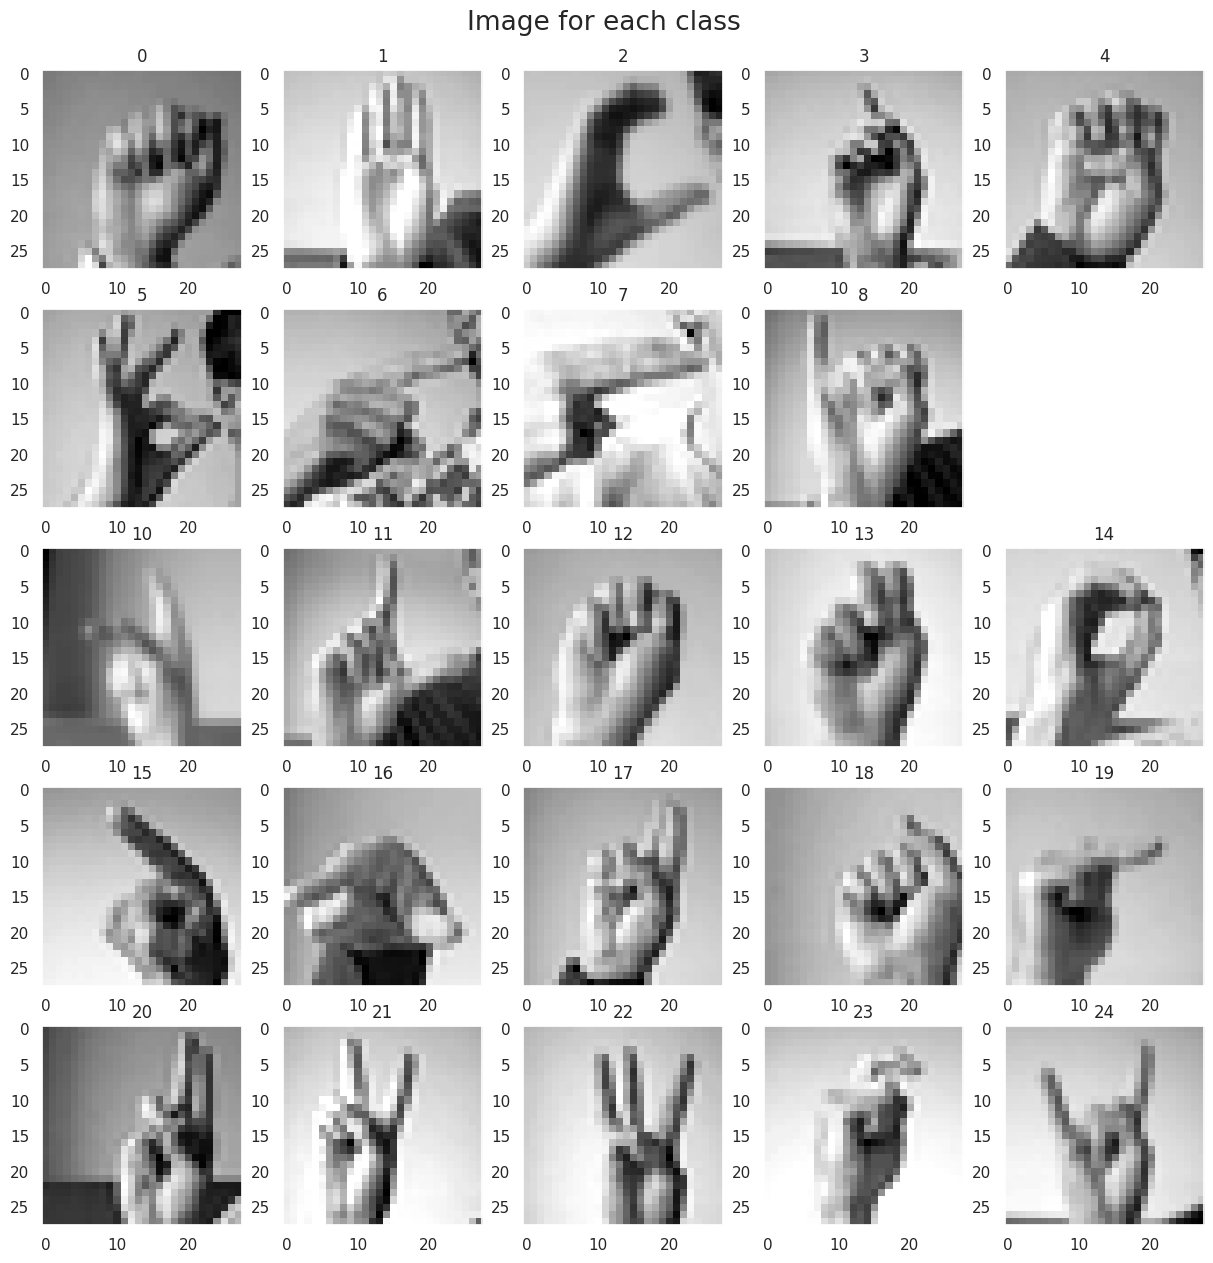

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in val:

    s = i + 1
    plt.subplot(5,5,s)

    result = np.where(y_train == i)
    plt.imshow(X_train[result[0][0],:,:],cmap='gray')

    plt.title(i)
    plt.grid(False)
    plt.suptitle("Image for each class",size=19,y=0.92)

plt.show()
plt.subplots_adjust(top = 0.91,left=0.1,right= 0.93,hspace = 0.5,wspace = 0.3)

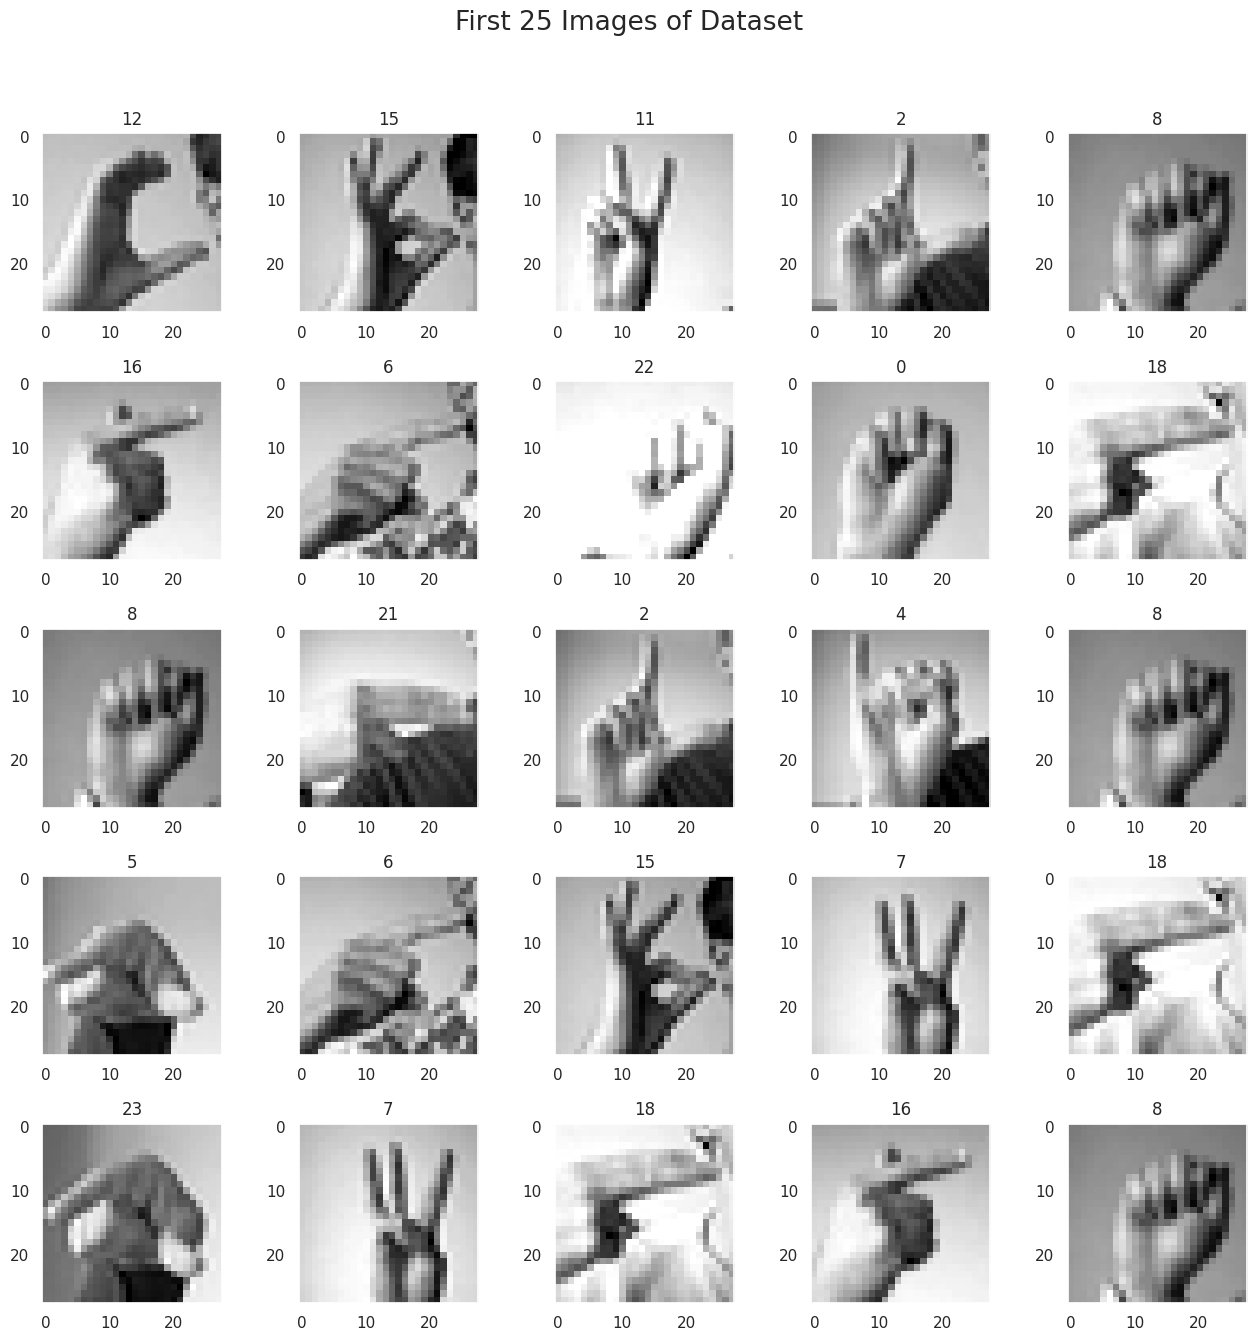

In [ ]:
fig = plt.figure(figsize = (13,13),tight_layout=True)

for i,b in enumerate(y_train[:25]):

    # Enumerate starting at 0, add 1 for subplotting
    i = i + 1

    # Create axes object
    ax = fig.add_subplot(5,5,i)

    # Plot  histogram using seaborn
    plt.imshow(X_train[b,:,:], cmap='gray')
    plt.title(b)
    plt.grid(False)

plt.suptitle('First 25 Images of Dataset', y=1.03, size=19)
plt.tight_layout()
plt.show()

***
-> Classes D(3), R(17) and U(20) look alike. All of these images have the index finger or two fingers pointing upwards and are difficult to distinguish.

-> Classes A(0), E(4), M(12), N(13) and S(18) are also very similar. All have a closed fist.

-> So i think the classes A, E, D, M, N, R, S and U would be difficult to distinguish.
***

In [ ]:
y_train_uniq = np.unique(y_train)
y_train_uniq

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
y_test_uniq = np.unique(y_test)
y_test_uniq

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
# check shape of data
print("Training data shape: ",X_train.shape)
print("Training data shape: ",y_train.shape)
print()
print("Testing data shape: ",X_test.shape)
print("Testing data shape: ",y_test.shape)

Training data shape:  (20591, 28, 28)
Training data shape:  (20591,)

Testing data shape:  (6864, 28, 28)
Testing data shape:  (6864,)


In [ ]:
X_test = X_test /255.0
X_train = X_train /255.0

#naming the classes from A to Y
class_names = np.array(["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"])

#print first 25 class names
print(class_names[y_train[:24]])

['M' 'P' 'L' 'C' 'I' 'Q' 'G' 'W' 'A' 'S' 'I' 'V' 'C' 'E' 'I' 'F' 'G' 'P'
 'H' 'S' 'X' 'H' 'S' 'Q']


In [ ]:
print(X_train.shape)
print(y_train.shape)

(20591, 28, 28)
(20591,)


In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [ ]:
#training set
print("X_train: ",X_train.shape)
print("y_train_: ",y_train.shape)

#test set
print("X_test: ",X_test.shape)
print("y_test:_ ",y_test.shape)

X_train:  (20591, 28, 28, 1)
y_train_:  (20591,)
X_test:  (6864, 28, 28, 1)
y_test:_  (6864,)


In [ ]:
#one hot encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print("Shape")

print("y_train: ",y_train.shape)
print()
print("y_test: ",y_test.shape)

Shape
y_train:  (20591, 25)

y_test:  (6864, 25)


## Initialising Deep Learning Networks


We have have to treat this as a classification problem.


 - We have built a convolutional neural network (CNN) with the following specifications:
   - All filter (kernel) sizes are 3x3
   - Initial Conv2D layer with 64 filters
   - Second Conv2D layer with 128 filters
   - (Optional) Third Conv2D layer with 256 filters
   - MaxPooling layer following this
   - Fully connected dense layer with 64/128 nodes
   - (Optional) Dropout layer with rate = 0.2/0.3/0.4
   - Dense output layer after this with 25 nodes
  
  
 - The number of epochs is **10**
 - The batch size is **50**
 - We used the **Adam** optimiser, with its default learning rate
 - We used the **Relu** activation function for the hidden layers
 - We used the **Softmax** activation function for the output layer
 - Train:Test split is 80:20 of the total data provided.

In [ ]:
#plot accuracy and loss curves
def plot_history_accuracy(history):

    plt.figure(figsize=(8,5),linewidth = 7, edgecolor="whitesmoke")
    n = len(history.history['accuracy'])

    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange',marker=".")

    # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r',marker=".")
    plt.legend(['Train Acc','Val Acc'])
    plt.grid(True)

    # set vertical limit to 1
    plt.gca().set_ylim(-0.1, 1.1)

    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.suptitle("Learning Curve", size=16, y=0.927)
    plt.show()

In [ ]:
#plot accuracy and loss curves
def plot_history_loss(history):

    plt.figure(figsize=(8,5),linewidth = 7, edgecolor="whitesmoke")
    n = len(history.history['accuracy'])

    plt.plot(np.arange(0,n),history.history['loss'],'b', marker=".")

    # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g', marker=".")

    plt.legend(['Train Loss','Val Loss'])
    plt.grid(True)

    # set vertical limit to 1
    plt.gca().set_ylim(-0.1, 1.1)

    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.suptitle("Learning Curve", size=16, y=0.927)
    plt.show()

In [ ]:
n_train = y_train.shape[0]
n_test = y_test.shape[0]

# the number and size of hidden layers
hiddensizes = [64,128,256]

# the activation function to be used in hidden layers
actfn = "relu"

# Optimiser and learning rate
optimizer = tf.keras.optimizers.Adam

learningrate = 0.001   # Adam default value

# Set size of batch and number of epochs
batch_size = 50
n_epochs = 10

# CNN Model 1

In [ ]:
# CNN model
def model_cnn_1(hiddensizes, actfn, optimizer, learningrate=0):

    model = keras.models.Sequential()

    # input layer goes into this 2D convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size = 3, strides = 2, activation=actfn, padding="same", input_shape=[28, 28, 1]))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 2nd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # unravel into a 1D vector
    model.add(keras.layers.Flatten())

    #dense layer
    model.add(keras.layers.Dense(64, activation = "relu"))

    #dense layer
    model.add(keras.layers.Dense(25, activation = "softmax"))

    model.compile(loss="categorical_crossentropy", optimizer = optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
def do_all1(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size):

    #CNN model
    model1 = model_cnn_1(hiddensizes, actfn, optimizer, learningrate)

    #fit the model
    history1 = model1.fit(X_train, y_train, epochs=n_epochs,validation_data =(X_test, y_test))

    #calcualte val_accuracy
    max_val_acc = np.max(history1.history['val_accuracy'])

    #evaluate the model
    testres1 = model1.evaluate(X_test, y_test, verbose=0)

    return (max_val_acc, testres1[1], history1, model1)

In [ ]:
valacc, testacc, history1, model1 = do_all1(hiddensizes, actfn, optimizer, learningrate, n_train, n_test, n_epochs,batch_size)

Epoch 1/10
644/644 [==============================] - 14s 20ms/step - loss: 1.7918 - accuracy: 0.4589 - val_loss: 0.8042 - val_accuracy: 0.7348
Epoch 2/10
644/644 [==============================] - 12s 18ms/step - loss: 0.4703 - accuracy: 0.8527 - val_loss: 0.2861 - val_accuracy: 0.9207
Epoch 3/10
644/644 [==============================] - 10s 16ms/step - loss: 0.1770 - accuracy: 0.9559 - val_loss: 0.1118 - val_accuracy: 0.9722
Epoch 4/10
644/644 [==============================] - 12s 18ms/step - loss: 0.0758 - accuracy: 0.9858 - val_loss: 0.0472 - val_accuracy: 0.9933
Epoch 5/10
644/644 [==============================] - 11s 18ms/step - loss: 0.0329 - accuracy: 0.9958 - val_loss: 0.0216 - val_accuracy: 0.9975
Epoch 6/10
644/644 [==============================] - 12s 18ms/step - loss: 0.0192 - accuracy: 0.9979 - val_loss: 0.0271 - val_accuracy: 0.9964
Epoch 7/10
644/644 [==============================] - 13s 20ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 0.0286 - val_accuracy:

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
# results (loss and accuracy)
testres1 = model1.evaluate(X_test, y_test, verbose=0)

print("Validation set")
print('loss, accuracy:', testres1)

Validation set
loss, accuracy: [0.054452888667583466, 0.9823718070983887]


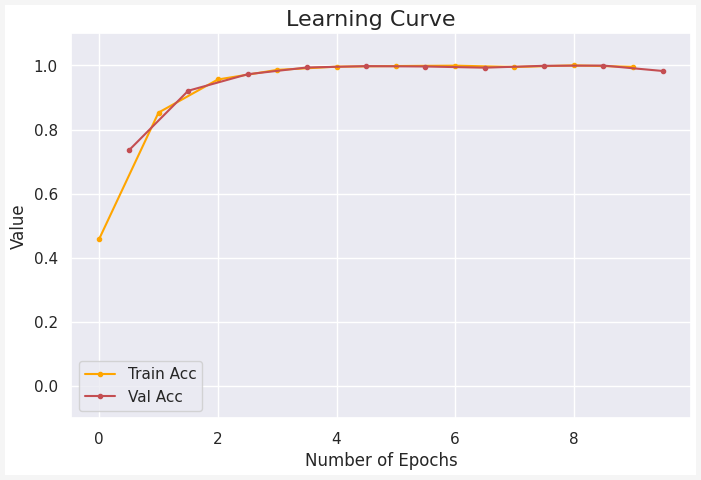

In [ ]:
plot_history_accuracy(history1)

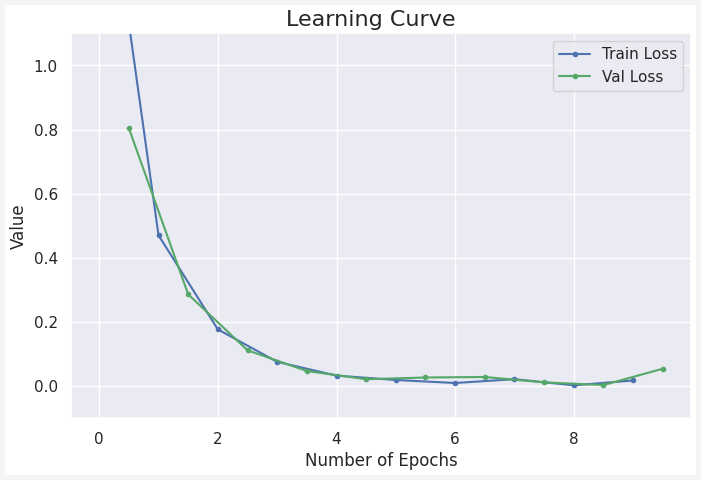

In [ ]:
plot_history_loss(history1)

# CNN Model 2

In [ ]:
# CNN model
def model_cnn_2(hiddensizes, actfn, optimizer, learningrate=0):

    model = keras.models.Sequential()

    # input layer goes into this 2D convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size = 3, strides = 2, activation=actfn, padding="same", input_shape=[28, 28, 1]))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 2nd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 3rd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[2], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    # model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # unravel into a 1D vector
    model.add(keras.layers.Flatten())

    #dense layer
    model.add(keras.layers.Dense(128, activation = "relu"))

    #dense layer
    model.add(keras.layers.Dense(25, activation = "softmax"))

    model.compile(loss="categorical_crossentropy", optimizer = optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
def do_all2(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size):

    #CNN model
    model2 = model_cnn_2(hiddensizes, actfn, optimizer, learningrate)

    #fit the model
    history2 = model2.fit(X_train, y_train, epochs=n_epochs,validation_data =(X_test, y_test))

    #calcualte val_accuracy
    max_val_acc = np.max(history2.history['val_accuracy'])

    #evaluate the model
    testres2 = model2.evaluate(X_test, y_test, verbose=0)

    return (max_val_acc, testres2[1], history2, model2)

In [ ]:
valacc, testacc, history2, model2 = do_all2(hiddensizes, actfn, optimizer, learningrate, n_train, n_test, n_epochs,batch_size)

Epoch 1/10
644/644 [==============================] - 23s 34ms/step - loss: 1.7291 - accuracy: 0.4563 - val_loss: 0.6328 - val_accuracy: 0.7853
Epoch 2/10
644/644 [==============================] - 22s 35ms/step - loss: 0.3967 - accuracy: 0.8674 - val_loss: 0.1842 - val_accuracy: 0.9509
Epoch 3/10
644/644 [==============================] - 21s 33ms/step - loss: 0.1238 - accuracy: 0.9659 - val_loss: 0.0734 - val_accuracy: 0.9812
Epoch 4/10
644/644 [==============================] - 22s 35ms/step - loss: 0.0482 - accuracy: 0.9880 - val_loss: 0.0307 - val_accuracy: 0.9936
Epoch 5/10
644/644 [==============================] - 21s 33ms/step - loss: 0.0134 - accuracy: 0.9978 - val_loss: 0.0168 - val_accuracy: 0.9961
Epoch 6/10
644/644 [==============================] - 22s 35ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.0414 - val_accuracy: 0.9859
Epoch 7/10
644/644 [==============================] - 21s 33ms/step - loss: 0.0342 - accuracy: 0.9898 - val_loss: 0.0273 - val_accuracy:

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 1, 256)         295168    
                                                                 
 flatten_1 (Flatten)         (None, 256)              

In [ ]:
# results (loss and accuracy)
testres2 = model2.evaluate(X_test, y_test, verbose=0)

print("Validation set")
print('loss, accuracy:', testres2)

Validation set
loss, accuracy: [0.020435471087694168, 0.9941725134849548]


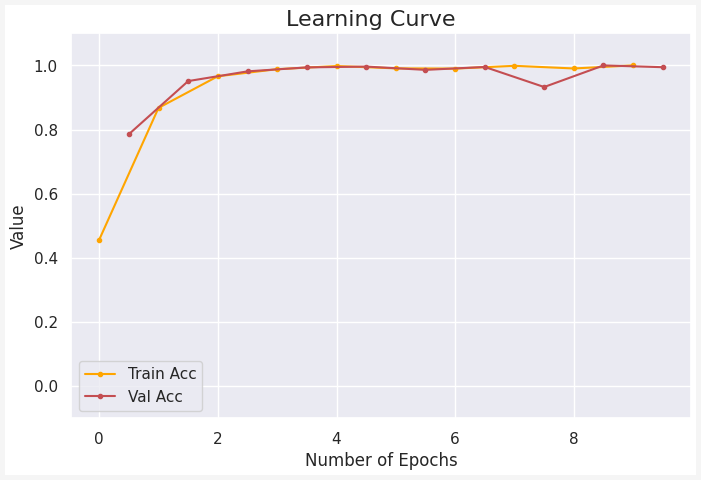

In [ ]:
plot_history_accuracy(history2)

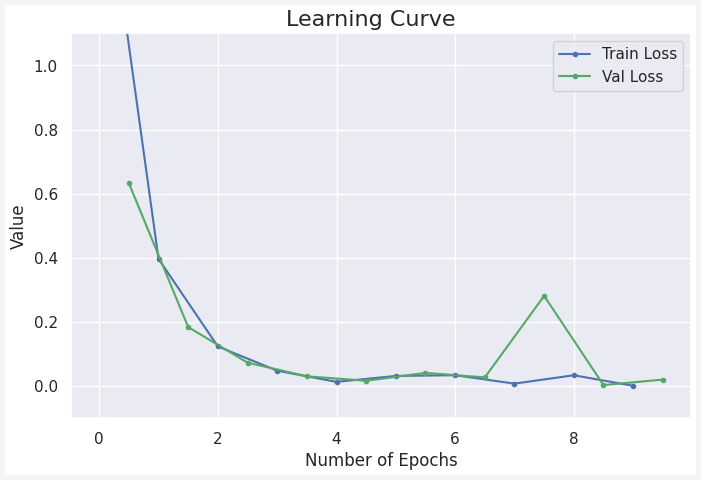

In [ ]:
plot_history_loss(history2)

# CNN Model 3

In [ ]:
# CNN model
def model_cnn_3(hiddensizes, actfn, optimizer, learningrate=0):

    model = keras.models.Sequential()

    # input layer goes into this 2D convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size = 3, strides = 2, activation=actfn, padding="same", input_shape=[28, 28, 1]))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 2nd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 3rd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[2], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    # model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # unravel into a 1D vector
    model.add(keras.layers.Flatten())

    #dense layer
    model.add(keras.layers.Dense(128, activation = "relu"))

    # Dropout
    model.add(keras.layers.Dropout(rate=0.2))

    #dense layer
    model.add(keras.layers.Dense(25, activation = "softmax"))

    model.compile(loss="categorical_crossentropy", optimizer = optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
def do_all3(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size):

    #CNN model
    model3 = model_cnn_3(hiddensizes, actfn, optimizer, learningrate)

    #fit the model
    history3 = model3.fit(X_train, y_train, epochs=n_epochs,validation_data =(X_test, y_test))

    #calcualte val_accuracy
    max_val_acc = np.max(history3.history['val_accuracy'])

    #evaluate the model
    testres3 = model3.evaluate(X_test, y_test, verbose=0)

    return (max_val_acc, testres3[1], history3, model3)

In [ ]:
valacc, testacc, history3, model3 = do_all3(hiddensizes, actfn, optimizer, learningrate, n_train, n_test, n_epochs,batch_size)

Epoch 1/10
644/644 [==============================] - 24s 35ms/step - loss: 1.7664 - accuracy: 0.4327 - val_loss: 0.6173 - val_accuracy: 0.7810
Epoch 2/10
644/644 [==============================] - 23s 36ms/step - loss: 0.4157 - accuracy: 0.8538 - val_loss: 0.1707 - val_accuracy: 0.9471
Epoch 3/10
644/644 [==============================] - 21s 33ms/step - loss: 0.1538 - accuracy: 0.9503 - val_loss: 0.0483 - val_accuracy: 0.9913
Epoch 4/10
644/644 [==============================] - 23s 35ms/step - loss: 0.0643 - accuracy: 0.9818 - val_loss: 0.0147 - val_accuracy: 0.9984
Epoch 5/10
644/644 [==============================] - 21s 33ms/step - loss: 0.0405 - accuracy: 0.9887 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 6/10
644/644 [==============================] - 23s 35ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 7/10
644/644 [==============================] - 22s 35ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0264 - val_accuracy:

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 1, 256)         295168    
                                                                 
 flatten_4 (Flatten)         (None, 256)              

In [ ]:
# results (loss and accuracy)
testres3 = model3.evaluate(X_test, y_test, verbose=0)

print("Validation set")
print('loss, accuracy:', testres3)

Validation set
loss, accuracy: [0.002648827387019992, 0.9989801645278931]


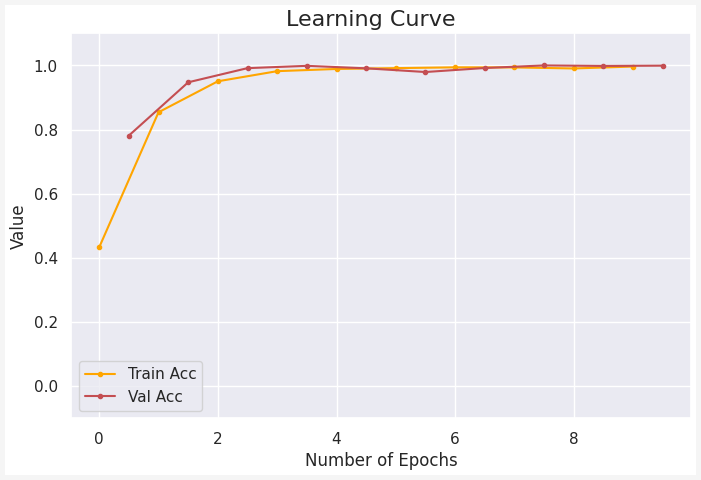

In [ ]:
plot_history_accuracy(history3)

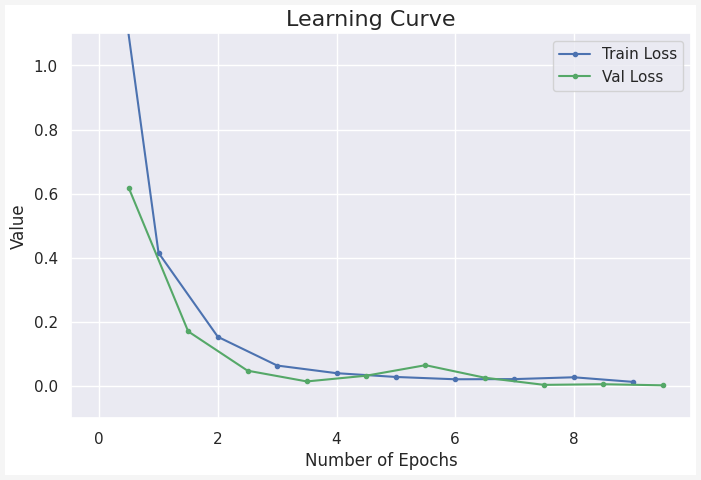

In [ ]:
plot_history_loss(history3)

# CNN Model 4

In [ ]:
# CNN model
def model_cnn_4(hiddensizes, actfn, optimizer, learningrate=0):

    model = keras.models.Sequential()

    # input layer goes into this 2D convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size = 3, strides = 2, activation=actfn, padding="same", input_shape=[28, 28, 1]))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 2nd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 3rd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[2], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    # model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # unravel into a 1D vector
    model.add(keras.layers.Flatten())

    #dense layer
    model.add(keras.layers.Dense(128, activation = "relu"))

    # Dropout
    model.add(keras.layers.Dropout(rate=0.3))

    #dense layer
    model.add(keras.layers.Dense(25, activation = "softmax"))

    model.compile(loss="categorical_crossentropy", optimizer = optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
def do_all4(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size):

    #CNN model
    model4 = model_cnn_4(hiddensizes, actfn, optimizer, learningrate)

    #fit the model
    history4 = model4.fit(X_train, y_train, epochs=n_epochs,validation_data =(X_test, y_test))

    #calcualte val_accuracy
    max_val_acc = np.max(history4.history['val_accuracy'])

    #evaluate the model
    testres4 = model4.evaluate(X_test, y_test, verbose=0)

    return (max_val_acc, testres4[1], history4, model4)

In [ ]:
valacc, testacc, history4, model4 = do_all4(hiddensizes, actfn, optimizer, learningrate, n_train, n_test, n_epochs,batch_size)

Epoch 1/10
644/644 [==============================] - 24s 36ms/step - loss: 1.8935 - accuracy: 0.3888 - val_loss: 0.7387 - val_accuracy: 0.7381
Epoch 2/10
644/644 [==============================] - 21s 33ms/step - loss: 0.5613 - accuracy: 0.8007 - val_loss: 0.2914 - val_accuracy: 0.9031
Epoch 3/10
644/644 [==============================] - 22s 35ms/step - loss: 0.2413 - accuracy: 0.9161 - val_loss: 0.0770 - val_accuracy: 0.9859
Epoch 4/10
644/644 [==============================] - 21s 33ms/step - loss: 0.1041 - accuracy: 0.9669 - val_loss: 0.0302 - val_accuracy: 0.9949
Epoch 5/10
644/644 [==============================] - 22s 35ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0612 - val_accuracy: 0.9803
Epoch 6/10
644/644 [==============================] - 21s 33ms/step - loss: 0.0393 - accuracy: 0.9887 - val_loss: 0.0134 - val_accuracy: 0.9974
Epoch 7/10
644/644 [==============================] - 22s 35ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0084 - val_accuracy:

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 1, 1, 256)         295168    
                                                                 
 flatten_5 (Flatten)         (None, 256)              

In [ ]:
# results (loss and accuracy)
testres4 = model4.evaluate(X_test, y_test, verbose=0)

print("Validation set")
print('loss, accuracy:', testres4)

Validation set
loss, accuracy: [0.0010410463437438011, 0.999854326248169]


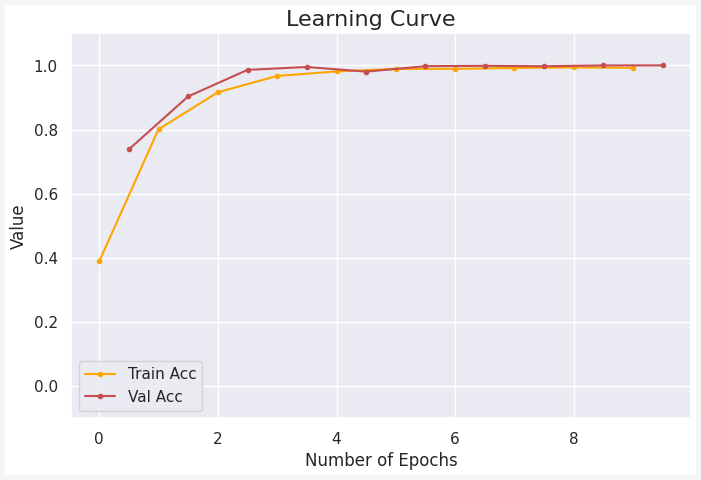

In [ ]:
plot_history_accuracy(history4)

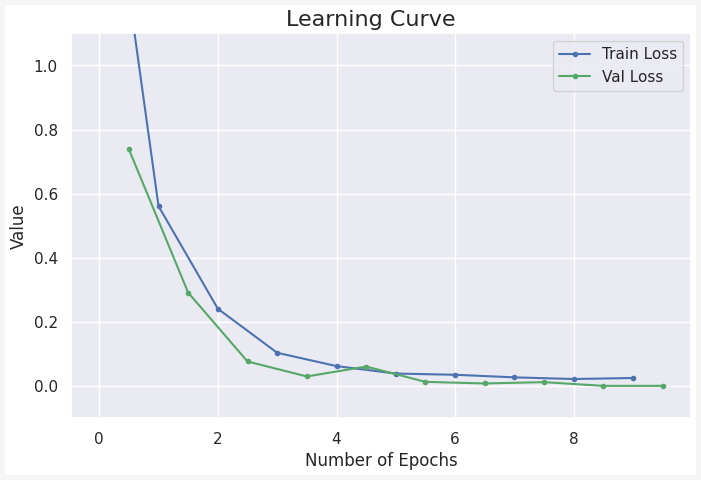

In [ ]:
plot_history_loss(history4)

# CNN Model 5

In [ ]:
# CNN model
def model_cnn_5(hiddensizes, actfn, optimizer, learningrate=0):

    model = keras.models.Sequential()

    # input layer goes into this 2D convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size = 3, strides = 2, activation=actfn, padding="same", input_shape=[28, 28, 1]))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 2nd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 3rd convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[2], kernel_size=(3,3), strides = 2, padding="same", activation=actfn))

    # Pool (downsize)
    # model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

    # unravel into a 1D vector
    model.add(keras.layers.Flatten())

    #dense layer
    model.add(keras.layers.Dense(128, activation = "relu"))

    # Dropout
    model.add(keras.layers.Dropout(rate=0.4))

    #dense layer
    model.add(keras.layers.Dense(25, activation = "softmax"))

    model.compile(loss="categorical_crossentropy", optimizer = optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
def do_all5(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size):

    #CNN model
    model5 = model_cnn_5(hiddensizes, actfn, optimizer, learningrate)

    #fit the model
    history5 = model5.fit(X_train, y_train, epochs=n_epochs,validation_data =(X_test, y_test))

    #calcualte val_accuracy
    max_val_acc = np.max(history5.history['val_accuracy'])

    #evaluate the model
    testres5 = model5.evaluate(X_test, y_test, verbose=0)

    return (max_val_acc, testres5[1], history5, model5)

In [ ]:
valacc, testacc, history5, model5 = do_all5(hiddensizes, actfn, optimizer, learningrate, n_train, n_test, n_epochs,batch_size)

Epoch 1/10
644/644 [==============================] - 26s 38ms/step - loss: 2.0932 - accuracy: 0.3290 - val_loss: 0.9096 - val_accuracy: 0.6935
Epoch 2/10
644/644 [==============================] - 22s 35ms/step - loss: 0.6877 - accuracy: 0.7560 - val_loss: 0.3383 - val_accuracy: 0.8971
Epoch 3/10
644/644 [==============================] - 21s 33ms/step - loss: 0.2881 - accuracy: 0.8998 - val_loss: 0.1238 - val_accuracy: 0.9698
Epoch 4/10
644/644 [==============================] - 22s 35ms/step - loss: 0.1453 - accuracy: 0.9509 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 5/10
644/644 [==============================] - 21s 32ms/step - loss: 0.0733 - accuracy: 0.9781 - val_loss: 0.0244 - val_accuracy: 0.9959
Epoch 6/10
644/644 [==============================] - 22s 35ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0059 - val_accuracy: 0.9996
Epoch 7/10
644/644 [==============================] - 21s 33ms/step - loss: 0.0468 - accuracy: 0.9849 - val_loss: 0.0062 - val_accuracy:

In [ ]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 1, 256)         295168    
                                                                 
 flatten_6 (Flatten)         (None, 256)              

In [ ]:
# results (loss and accuracy)
testres5 = model5.evaluate(X_test, y_test, verbose=0)

print("Validation set")
print('loss, accuracy:', testres5)

Validation set
loss, accuracy: [0.015522504225373268, 0.9943181872367859]


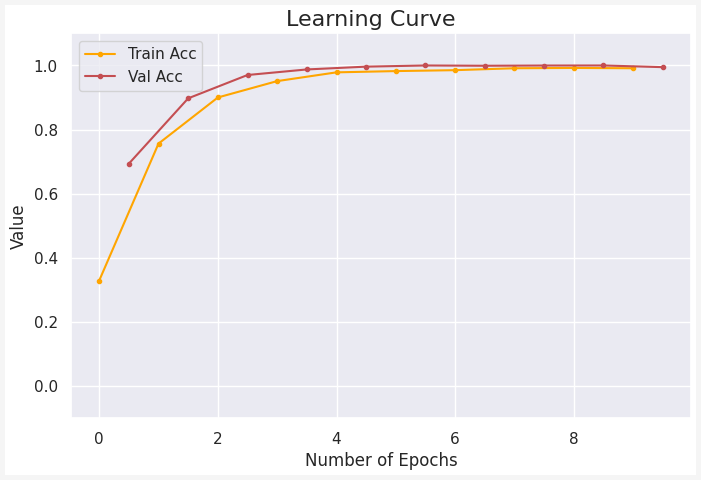

In [ ]:
plot_history_accuracy(history5)

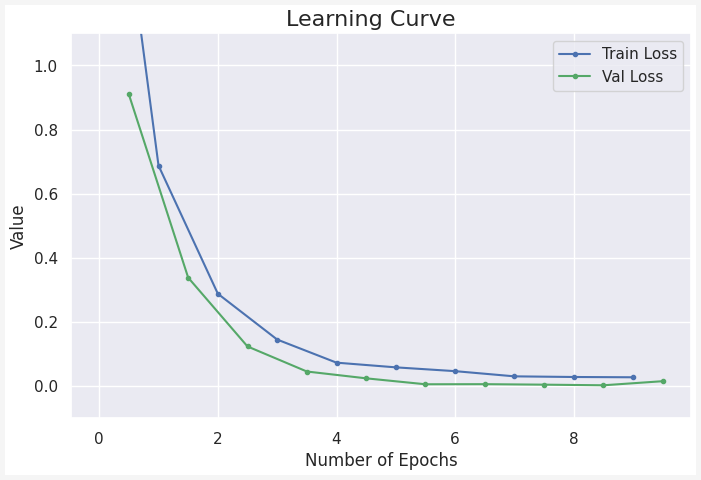

In [ ]:
plot_history_loss(history5)

# Conclusion

- In CNN Model 1 we used only 2 convolutional layers with 64 and 128 nodes, without a droupout layer.
  - We got the following results:
    - Loss = 0.054452888667583466,
    - Accuracy = 0.9823718070983887

- In CNN Model 2 we introduced a third convolutional layer with 256 nodes, without a dropout layer in the CNN Model 1.
  - We got the following results:
    - Loss = 0.020435471087694168,
    - Accuracy = 0.9941725134849548

- In CNN Model 3 we introduced a dropout layer with rate 0.2 between the 2 Dense layers.
  - We got the following results:
    - Loss = 0.002648827387019992,
    - Accuracy = 0.9989801645278931

- In CNN Model 4 we updated the dropout rate to 0.3.
  - We got the following results:
    - Loss = 0.0010410463437438011,
    - Accuracy = 0.999854326248169

- In CNN Model 5 we further increased the dropout rate to 0.4.
  - We got the following results:
    - Loss = 0.015522504225373268,
    - Accuracy = 0.9943181872367859

- The convolutional layer is an important part of a CNN, and its main function is to extract features. Hence when we introduced a third convolutional layer the acuracy increased from Model 1 to Model 2.

- In the too densely connected layers single neuron of one layer is connected to all the other neurons of the other layer which creates a problem of overfitting . To overcome this issue CNN has a functionality of dropout which helps in reducing overfitting.

- By randomly dropping out neurons during training, dropout encourages the network to learn more robust representations of the input data. Hence we can see the increase in accuracy from Model 2 to Model 3.

- Further increasing the dropout to 0.3 increases the accuracy from Model 3 to Model 4 decreasing some overfitting which might be happening.

- But at the same time increasing the dropout rate too much is also not good as it can happen that some links which are important may also be dropped. This can be seen as the accuracy decreases from model 4 to Model 5.

- Hence for the mini project we found that the following CNN gives the best accuracy for ASL recognition.

- 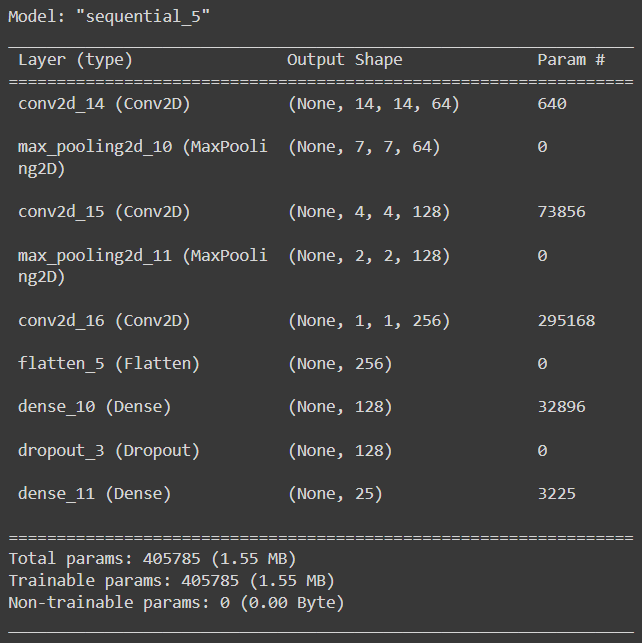